# Gradient Decent
Mục tiêu:  
* Mô tả quá trình hoạt động của 3 thuật toán gần đúng Gradient Decent (chính là Batch Gradient Descent - GD), Stochasitic Gradient Decent (SGD), và Mini-batch Gradient Decent (MGD). Các thuật toán này là cơ sở của các thuật toán tối ưu hoá gần đúng sau này trong Deep Learning - AI

Nhắc lại lý thuyết:  
Giả sử có hàm $J(w)$ là cost-function của một mô hình. Ta muốn tìm ra $w$ để $J(w)$ đạt cực tiểu.  
Theo lý thuyết, $J(w)$ đạt cực trị khi $dJ/dw=0$ nếu $w$ là 1 biến 1 chiều và $\nabla_{w}J = 0$ nều $w$ là biến nhiều chiều.  
Trong phương pháp GD, ta tính gần đúng $w$ bằng:  
$w^{(i+1)}:=w^{(i)}-\alpha \nabla_{w}J$  
Vậy ta cần phải:  
* Tạo giá trị đầu cho $w$  
* Lựa chọn hyperparameter $\alpha$  
* Lựa chọn số lần lặp  
* Tìm đạo hàm của hàm cost-function cần tối ưu  

Trong ví dụ này, ta sẽ dùng phương pháp này tính gần đúng bộ thông số cho hàm hồi quy tuyến tính, có cost function là MSE

Bước 1: Nạp thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Tạo 1 bộ dữ liệu ví dụ. Bộ dữ liệu này có dạng tuyến tính

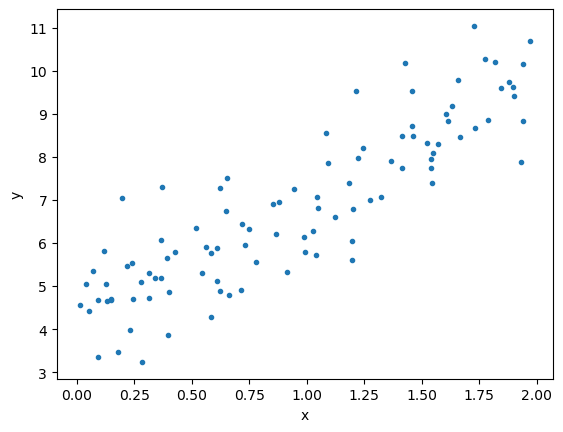

In [2]:
np.random.seed(42)
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
plt.plot(x,y,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Dùng phương pháp giải tích như lý thuyết
Hàm có dạng $y = w*x +b$ có thể được chuyển thành $y  = w*x$ nếu ta đổi x bằng [1, x] và đổi w bằng [w0, w]  
Khi đó $w=(x^Tx)^{-1}xy$

In [3]:
x1 = np.c_[np.ones((100,1)),x]

In [4]:
x1.shape

(100, 2)

In [5]:
w_analytic = np.matmul (np.matmul( np.linalg.inv(np.matmul(x1.transpose(),x1)), x1.transpose()), y)

In [6]:
# Giờ đây ta đã có b và w
w_analytic

array([[4.21509616],
       [2.77011339]])

## Dùng hàm của Scikit Learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

Ta thấy rõ ràng kết quả giống nhau

## Thuật toán Gradient Descent

In [8]:
alpha = 0.1 #Learning rate
n_interation = 1000
m = len(y)              #Tổng số phần tử

w_gd = np.random.randn(2,1)    #tạo giá trị đầu
w_gd_list = []

for i in range(n_interation):
    gradient = 2 / m * x1.transpose().dot(x1.dot(w_gd)-y)
    w_gd = w_gd - alpha*gradient
    w_gd_list.append(w_gd)

In [9]:
w_gd

array([[4.21509616],
       [2.77011339]])

## Thuật toán Stochastic Gradient Descent

In [10]:
w_sgd_list =[]
m = len(y)
t0, t1 = 5, 50

np.random.seed(42)

def learning_schedule(t):
    return t0 / (t0 + t1)

w = np.random.randn(2,1)

n_epochs = 50
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x1[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(w) - yi)
        alpha = 0.1 #learning_schedule(epoch * m + i)
        w = w - alpha * gradients
        w_sgd_list.append(w)  


In [11]:
w

array([[3.7625155],
       [2.5892927]])

## Thuật toán Mini-batch gradient descent

In [12]:
w_mgd_list = []

batch_size = 20
n_epochs = 100

np.random.seed(42)
w = np.random.randn(2,1)  # random initialization
m = len(y)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_epochs):

    shuffled_indices = np.random.permutation(m)
    x1_shuffled = x1[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        t += 1
        xi = x1_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradients = 2/batch_size * xi.T.dot(xi.dot(w) - yi)
        alpha = learning_schedule(t)
        w = w - alpha * gradients
        w_mgd_list.append(w)

In [13]:
w

array([[4.15421822],
       [2.69721385]])

## Sự hội tụ

In [21]:
w_sgd_list=np.array(w_sgd_list)
w_mgd_list=np.array(w_mgd_list)
w_gd_list=np.array(w_gd_list)

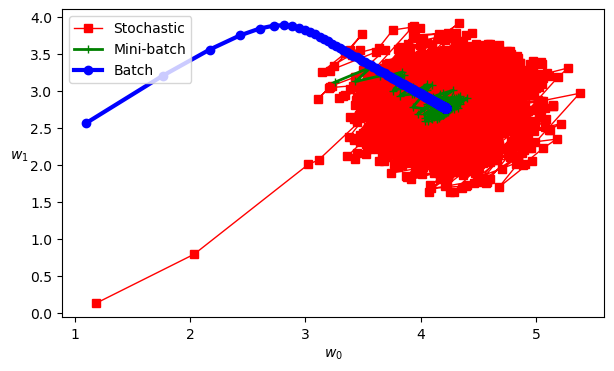

In [23]:
plt.figure(figsize=(7,4))
plt.plot(w_sgd_list[:, 0], w_sgd_list[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(w_mgd_list[:, 0], w_mgd_list[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(w_gd_list[:, 0], w_gd_list[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=10)
plt.xlabel(r"$w_0$", fontsize=10)
plt.ylabel(r"$w_1$   ", fontsize=10, rotation=0)
plt.show()